In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [4]:
data = pd.read_csv("BankNote_Authentication.csv")
data.head(10)

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.80730,-0.44699,0
1,4.54590,8.1674,-2.45860,-1.46210,0
2,3.86600,-2.6383,1.92420,0.10645,0
3,3.45660,9.5228,-4.01120,-3.59440,0
4,0.32924,-4.4552,4.57180,-0.98880,0
5,4.36840,9.6718,-3.96060,-3.16250,0
6,3.59120,3.0129,0.72888,0.56421,0
7,2.09220,-6.8100,8.46360,-0.60216,0
8,3.20320,5.7588,-0.75345,-0.61251,0
9,1.53560,9.1772,-2.27180,-0.73535,0


In [27]:
real_x = data.iloc[:,[0,1]].values
real_y = data.iloc[:,-1].values

In [28]:
training_x ,testing_x , training_y , testing_y = train_test_split(real_x,real_y,test_size = 0.25,random_state = 0)

In [35]:
svm_classi = SVC(kernel='rbf',random_state=42)
svm_classi.fit(training_x,training_y)

/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False)

In [36]:
pred = svm_classi.predict(testing_x)

In [37]:
from sklearn.metrics import accuracy_score 

In [39]:
test_acc = accuracy_score(testing_y,pred)
test_acc

0.9329446064139941

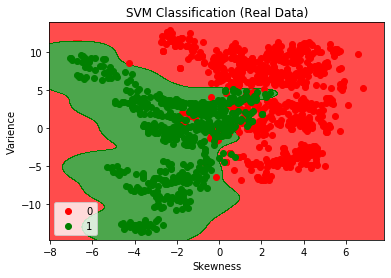

In [40]:
#graph
from matplotlib.colors import ListedColormap
clt =svm_classi
h  = 0.01
x_plot ,z_plot = real_x ,real_y

x_min , x_max = x_plot[: , 0].min() -1 , x_plot[: , 0].max()+1
y_min , y_max = x_plot[: , 1].min() -1 , x_plot[: , 1].max()+1
xx ,yy = np.meshgrid(np.arange(x_min , x_max , h),np.arange(y_min , y_max , h))

z = clt.predict(np.array([xx.ravel(),yy.ravel()]).T)
z = z.reshape(xx.shape)
plt.contourf(xx,yy,z,alpha = 0.7, cmap = ListedColormap(("red", "green")))

                 
for i, j in enumerate(np.unique(z_plot)):
    plt.scatter(x_plot[z_plot ==j, 0],x_plot[z_plot ==j, 1], c = ['red', 'green'][i],cmap = ListedColormap(('red','green')) ,label=j)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min() , yy.max())
plt.title("SVM Classification[RBF Kernal] (Real Data)")
plt.legend()
plt.ylabel("Varience")
plt.xlabel("Skewness")
plt.show()

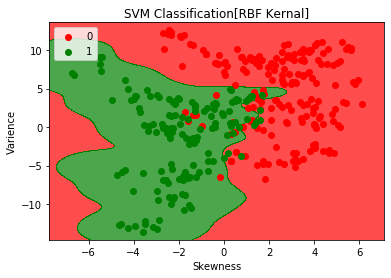

In [42]:
#graph
from matplotlib.colors import ListedColormap
clt =svm_classi
h  = 0.01
x_plot ,z_plot = testing_x , testing_y

x_min , x_max = x_plot[: , 0].min() -1 , x_plot[: , 0].max()+1
y_min , y_max = x_plot[: , 1].min() -1 , x_plot[: , 1].max()+1
xx ,yy = np.meshgrid(np.arange(x_min , x_max , h),np.arange(y_min , y_max , h))

z = clt.predict(np.array([xx.ravel(),yy.ravel()]).T)
z = z.reshape(xx.shape)
plt.contourf(xx,yy,z,alpha = 0.7, cmap = ListedColormap(("red", "green")))

                 
for i, j in enumerate(np.unique(z_plot)):
    plt.scatter(x_plot[z_plot ==j, 0],x_plot[z_plot ==j, 1], c = ['red', 'green'][i],cmap = ListedColormap(('red','green')) ,label=j)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min() , yy.max())
plt.title("SVM Classification[RBF Kernal]")
plt.legend()
plt.ylabel("Varience")
plt.xlabel("Skewness")
plt.show()